# Poquemon + Seaborn

## Importamos las librerias básicas

In [6]:
import requests
import io

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Captura de datos
En este bloque hacemos la captura de los datos. Se hace uso de request para obtenerlos, aunque seria posible hacer una descarga intermedia para guardar el CSV.

In [7]:
ruta='https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(ruta,headers=headers)
df=pd.read_csv(io.StringIO(response.text), index_col=0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 19.3+ KB


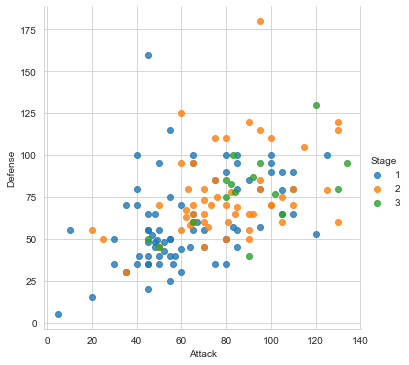

In [18]:
# Impongo el tema
sns.set_style('whitegrid')

# Creo el gráfico principal
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

# Ajusto parametros con matplotlib
plt.xlim=(0, None)
plt.ylim=(0, None)

<AxesSubplot:>

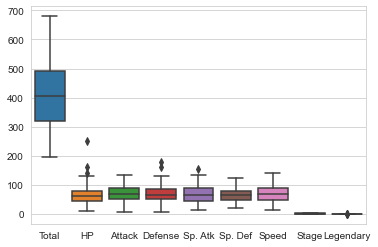

In [19]:
sns.boxplot(data=df)

<AxesSubplot:>

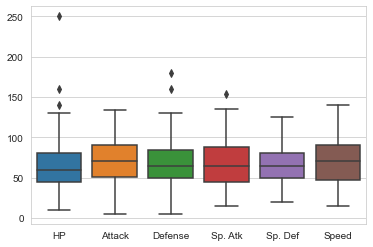

In [22]:
stats_df=df.drop(['Total','Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

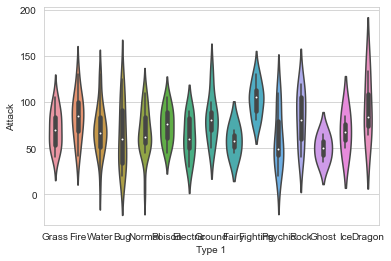

In [21]:
sns.violinplot(x='Type 1', y='Attack', data=df)

In [23]:
stats_df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,41,64,45,50,50,50
148,Dragonair,Dragon,NaN,61,84,65,70,70,70
149,Dragonite,Dragon,Flying,91,134,95,100,100,80


In [24]:
stats_df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,41,64,45,50,50,50
148,Dragonair,Dragon,NaN,61,84,65,70,70,70
149,Dragonite,Dragon,Flying,91,134,95,100,100,80


In [26]:
melted_df=pd.melt(stats_df, id_vars=['Name','Type 1', 'Type 2'], var_name='Stats')
melted_df.head()

,Name,Type 1,Type 2,Stats,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


## Mapa de calor regresión

<AxesSubplot:>

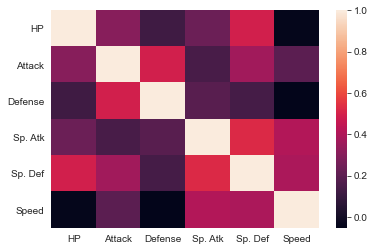

In [29]:
corr=stats_df.corr()
sns.heatmap(corr)

## Histogramas

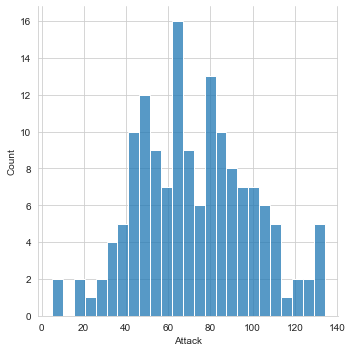

In [33]:
sns.displot(df.Attack, bins=25)

## Gráfico de barras

<AxesSubplot:xlabel='Type 1', ylabel='count'>

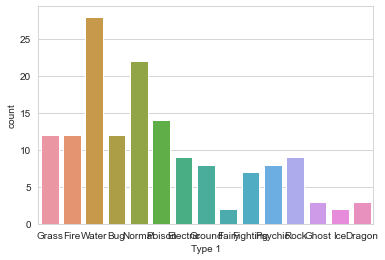

In [34]:
sns.countplot(x='Type 1', data=df)

## Gráfico de distribución

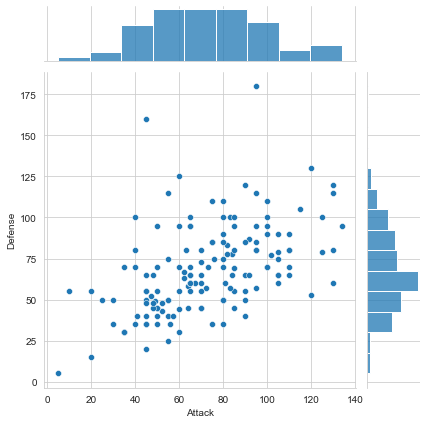

In [35]:
sns.jointplot(x='Attack', y='Defense', data=df)